<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

In [2]:
# datos
catsdf = pd.read_csv('data/cookie_cats.csv')

catsdf.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### 1. What We're Checking:

To see if the change is good, they're looking at two things:
- Retention at 1 day: Are people still playing the game one day after they start?
- Retention at 7 days: Are people still playing a week after they start?

In [3]:
# transformacion
cats_gate30 = catsdf[catsdf['version']=='gate_30']
cats_gate40 = catsdf[catsdf['version']=='gate_40']

## TEST `retention_1`


In [4]:
# We know the data : players and retained players (1 and 7 day) for test (gate_40) and control (gate_30)

retained_gate30 = len(cats_gate30[cats_gate30['retention_1']==1]) # Players on control version retained 1 day
players_gate30 = len(cats_gate30) # Players on control version

retained_gate40 = len(cats_gate40[cats_gate40['retention_1']==1]) # Players on test version retained 1 day
players_gate40 = len(cats_gate40) # Players on test version 

CR_ctrl = retained_gate30/players_gate30
CR_test = retained_gate40/players_gate40

f'Conversion Rates: Control: {CR_ctrl * 100:.2f}%, Test: {CR_test * 100:.2f}%'


'Conversion Rates: Control: 44.82%, Test: 44.23%'

In [5]:
from scipy.stats import beta

# a prioris

a_C, b_C = 1+retained_gate30, 1+players_gate30-retained_gate30

a_T, b_T = 1+retained_gate40, 1+players_gate40-retained_gate40


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [6]:
x=np.linspace(0.43, 0.46, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, conversion rate: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show()

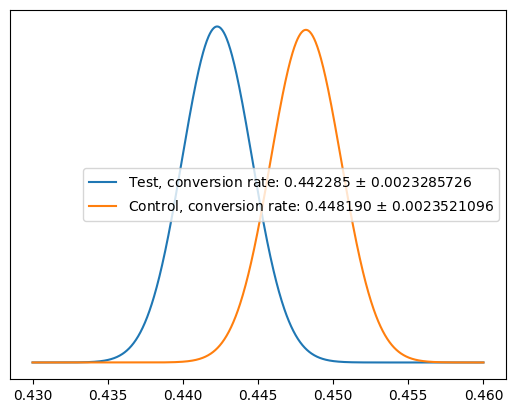

In [7]:
plot([beta_test, beta_control], ['Test', 'Control'])

In [8]:
diff = (beta_control.mean() - beta_test.mean())/beta_control.mean()

diff

0.013175098158249857

In [9]:
from bayes import *

bayes_prob = calc_prob(beta_test, beta_control)

bayes_prob

0.037206025177191036

In [10]:
'''The test reduces conversion {:2.2f}%, with a probability of {:2.2f}%'''.format(diff*100, bayes_prob*100)

'The test reduces conversion 1.32%, with a probability of 3.72%'

## TEST `retention_7`

In [11]:
# We know the data : players and retained players (1 and 7 day) for test (gate_40) and control (gate_30)

retained_gate30 = len(cats_gate30[cats_gate30['retention_7']==1]) # Players on control version retained 1 day
players_gate30 = len(cats_gate30) # Players on control version retained 1 day

retained_gate40 = len(cats_gate40[cats_gate40['retention_7']==1]) # Players on test version retained 1 day
players_gate40 = len(cats_gate40) # Players on test version retained 1 day

CR_ctrl = retained_gate30/players_gate30
CR_test = retained_gate40/players_gate40

f'Conversion Rates: Control: {CR_ctrl * 100:.2f}%, Test: {CR_test * 100:.2f}%'

'Conversion Rates: Control: 19.02%, Test: 18.20%'

In [12]:
from scipy.stats import beta

# a prioris

a_C, b_C = 1+retained_gate30, 1+players_gate30-retained_gate30

a_T, b_T = 1+retained_gate40, 1+players_gate40-retained_gate40


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.19021520289919913, 0.18201402475214878)

In [13]:
x=np.linspace(0.17, 0.2, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, conversion rate: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show()

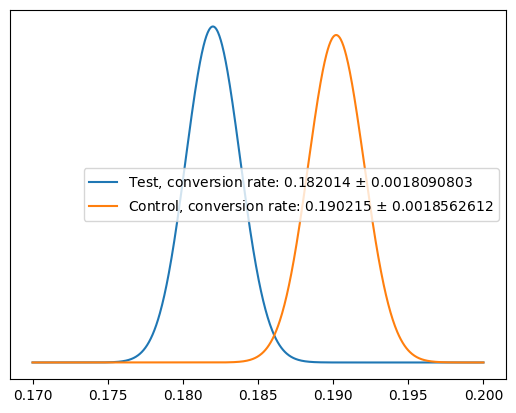

In [14]:
plot([beta_test, beta_control], ['Test', 'Control'])

In [15]:
diff = (beta_control.mean() - beta_test.mean())/beta_control.mean()
diff

0.04311526114658881

In [16]:
bayes_prob = calc_prob(beta_test, beta_control)
bayes_prob

0.0007773386645337392

In [17]:
'''The test reduces conversion {:2.2f}%, with a probability of {:2.2f}%'''.format(diff*100, bayes_prob*100)

'The test reduces conversion 4.31%, with a probability of 0.08%'

## **Conclusion**

- **1-Day Retention:**
The test with the gate placed on level 40 leads to a reduction in 1-day retention by `1.32%` with a probability of `3.72%`.

- **7-Day Retention:**
The test with the gate placed on level 40 results in a reduction in 7-day retention by `4.31%` with a probability of `0.08%`.


### BONUS
#### *To further support our conclusions, let's find out p-values of our retention rates with proportions ztest*

$$ H_0: \text{control 1 day retention} = \text{test 1 day retention} $$
$$ H_1: \text{control 1 day retention} \neq \text{test 1 day retention} $$

In [18]:
# 1 day retention proportions_ztest

control_res = catsdf[catsdf.version=='gate_30']['retention_1']
test_res = catsdf[catsdf.version=='gate_40']['retention_1']

sum(control_res), sum(test_res)

instalaciones = [control_res.shape[0], test_res.shape[0]]  # se instalan el juego
retenciones = [sum(control_res), sum(test_res)]     # tienen retención en 1 día

z_score, p_value = proportions_ztest(retenciones, nobs=instalaciones)
(control_a, test_a), (control_b, test_b) = proportion_confint(retenciones,
                                                                nobs=instalaciones,
                                                                alpha=0.05)
if p_value < 0.05:
    print(f"The p-value {round(p_value, 5)} < 0.05 we can reject the null hypothesis")
else:
    print(f"The p-value {round(p_value, 5)} > 0.05 we can't reject the null hypothesis")

The p-value 0.07441 > 0.05 we can't reject the null hypothesis


$$ H_0: \text{control 7 day retention} = \text{test 7 day retention} $$
$$ H_1: \text{control 7 day retention} \neq \text{test 7 day retention} $$

In [19]:
# 7 days retention proportions_ztest

control_res = catsdf[catsdf.version=='gate_30']['retention_7']
test_res = catsdf[catsdf.version=='gate_40']['retention_7']

sum(control_res), sum(test_res)

instalaciones = [control_res.shape[0], test_res.shape[0]]  # se instalan el juego
retenciones = [sum(control_res), sum(test_res)]     # tienen retención en 1 día

z_score, p_value = proportions_ztest(retenciones, nobs=instalaciones)
(control_a, test_a), (control_b, test_b) = proportion_confint(retenciones,
                                                                nobs=instalaciones,
                                                                alpha=0.05)
if p_value < 0.05:
    print(f"The p-value {round(p_value, 5)} < 0.05 we can reject the null hypothesis")
else:
    print(f"The p-value {round(p_value, 5)} > 0.05 we can't reject the null hypothesis")

The p-value 0.00155 < 0.05 we can reject the null hypothesis
